# Imports & file locations

In [1]:
%load_ext autoreload
%autoreload 2

import itertools
import os

import numpy as np
import scanpy 
import scanpy as sc
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import anndata

# Olga's modules
import xspecies

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# From https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
# You can use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).
idx = pd.IndexSlice


anndata.__version__

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()
scanpy.set_figure_params(frameon=False, color_map='magma_r')

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             4.7.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.2
ptypro

## Matplotlibrc

In [2]:
%%file matplotlibrc

# Non-interactive backend
backend: TkAgg

# Editable text on pdf export
pdf.fonttype: 42
ps.fonttype: 42

# Don't warn about too many figures open
figure.max_open_warning: 0

# Figure saving
savefig.transparent: True
savefig.bbox: tight
savefig.dpi: 300

# Fonts
font.sans-serif: Arial

Overwriting matplotlibrc


## Output, input directories

In [3]:
indir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/'

In [4]:

outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

GDRIVE_ANALYSIS_DIR = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

## Constants

In [5]:
groupby = "narrow_group"
species = "species"

tissue = "muscle"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "differential-expression")

# Load data

In [6]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__april2021__preprocessed.h5ad",
)
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 296 ms, sys: 238 ms, total: 534 ms
Wall time: 1.46 s


AnnData object with n_obs × n_vars = 26077 × 12879
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'cell_id_v1', 'cell_id_v2', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapiens', 'mouse_lemur__gene_name-lemur', 'mouse__gene_name-lemur', 'name-lemur', 'highly_variable-lemur', 'mouse_lemur__gene_name-mouse_ce', 'mouse__gene_name-mouse_ce', 'n_cells-mouse_tabula_muris_senis', 'mouse_lemur__gene_name-mouse_tabula_muris_senis', 'mouse__gene_name-mouse_tabula_muris_senis', 'n_cells', 'highly_variable', 'means', 'dis

## Make CrossSpeciesComparison object

In [7]:
cross_species = xspecies.CrossSpeciesComparison(adata, 'compartment_narrow')
# cross_species.plot_shared_cell_types()

compartment_narrow                            species    
endothelial: capillary cell                   Mouse          2457
                                              Mouse lemur     437
                                              Human          1701
endothelial: lymphatic cell                   Mouse             0
                                              Mouse lemur       0
                                              Human             0
lymphoid: B cell                              Mouse             0
                                              Mouse lemur       0
                                              Human             0
stromal: fast muscle cell                     Mouse           142
                                              Mouse lemur      41
                                              Human           220
stromal: mesenchymal cell                     Mouse          6884
                                              Mouse lemur     542
                  


------- group: endothelial: capillary cell -------
number of cells: 4595


extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3092


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


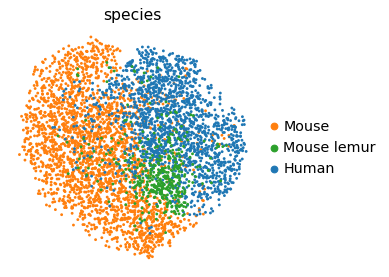

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: fast muscle cell -------
number of cells: 403
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


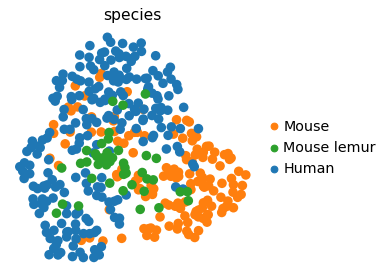

extracting highly variable genes



------- group: stromal: mesenchymal cell -------
number of cells: 13396


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3062


    finished (0:00:03)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


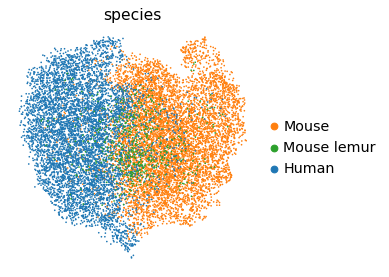

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: pericyte cell -------
number of cells: 891

 Number of highly variable genes: 3225


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


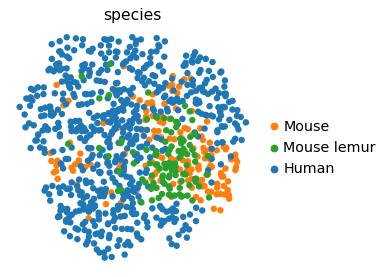

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: skeletal muscle satellite stem cell -------
number of cells: 3377

 Number of highly variable genes: 3101


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


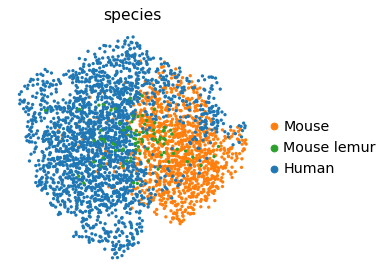

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: tendon cell -------
number of cells: 2107

 Number of highly variable genes: 3094


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


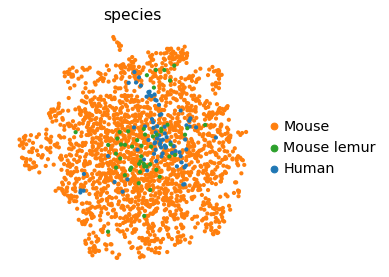

extracting highly variable genes



------- group: endothelial: capillary cell -------
number of cells: 4595


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3092


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


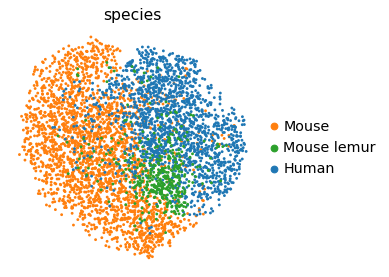

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: fast muscle cell -------
number of cells: 403
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


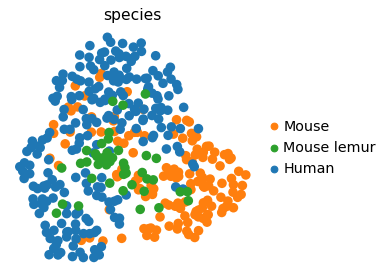

extracting highly variable genes



------- group: stromal: mesenchymal cell -------
number of cells: 13396


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3062


    finished (0:00:03)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


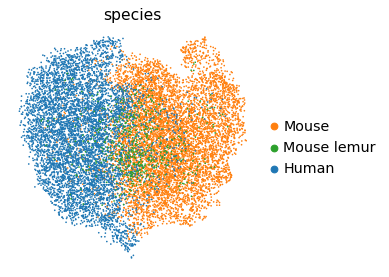

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.



------- group: stromal: pericyte cell -------
number of cells: 891


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3225


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


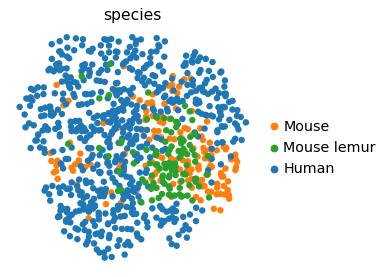

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)



------- group: stromal: skeletal muscle satellite stem cell -------
number of cells: 3377


computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3101


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


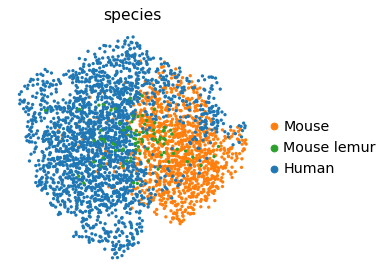

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: tendon cell -------
number of cells: 2107

 Number of highly variable genes: 3094


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


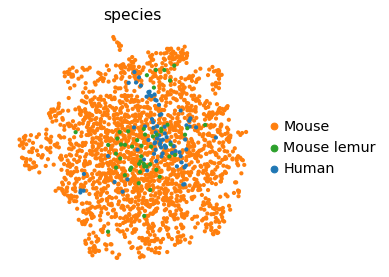

extracting highly variable genes



------- group: Mouse -------
number of cells: 12790


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3059


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


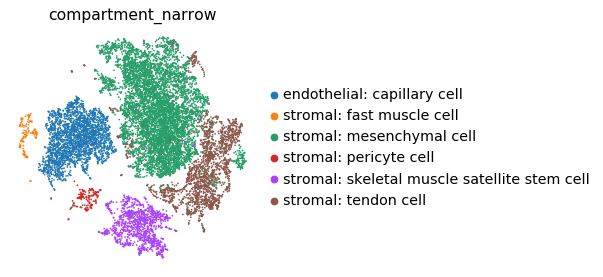

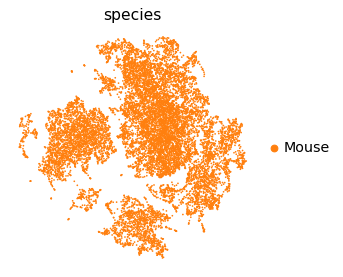

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: Mouse lemur -------
number of cells: 1260
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


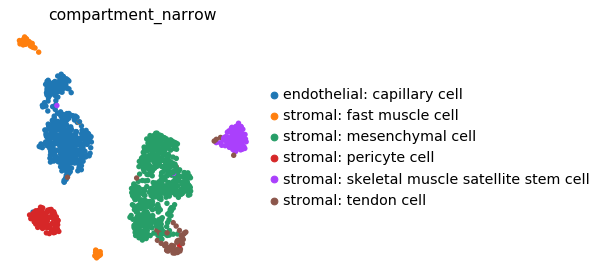

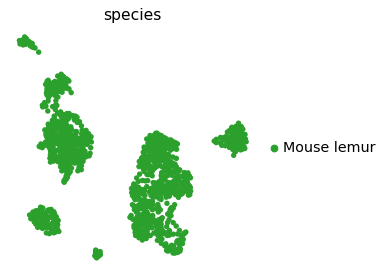

extracting highly variable genes



------- group: Human -------
number of cells: 10719


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3223


    finished (0:00:04)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


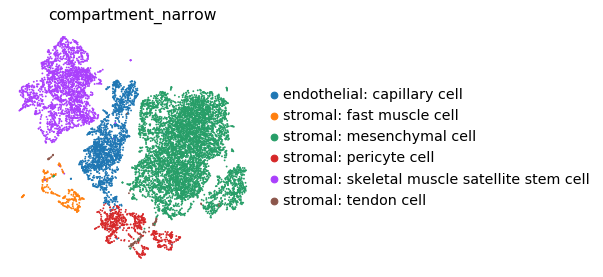

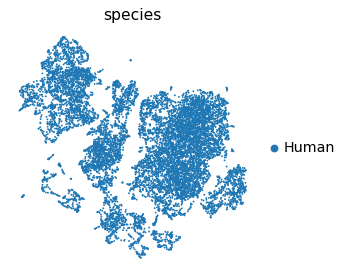

In [8]:
cross_species.make_mini_adatas(groupby='compartment_narrow')
cross_species.make_subset_adatas()

## Do differential expression

ranking genes



------- group: endothelial: capillary cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


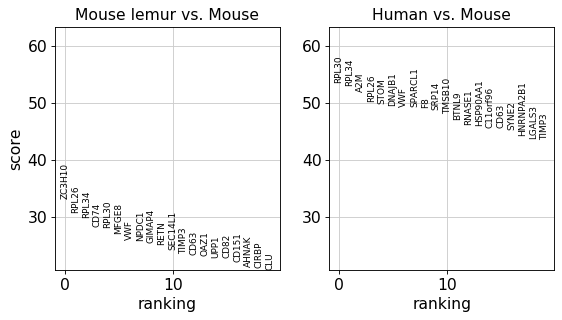

ranking genes



------- group: stromal: fast muscle cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  foldchanges[global_indices]
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed 

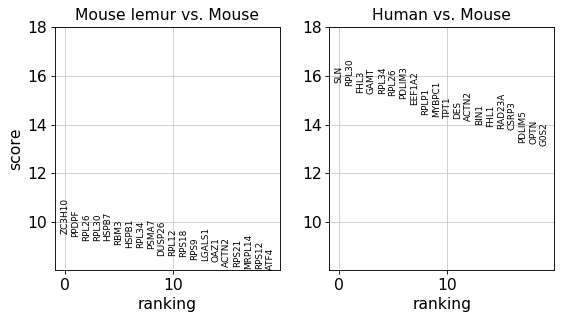

ranking genes



------- group: stromal: mesenchymal cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:19)


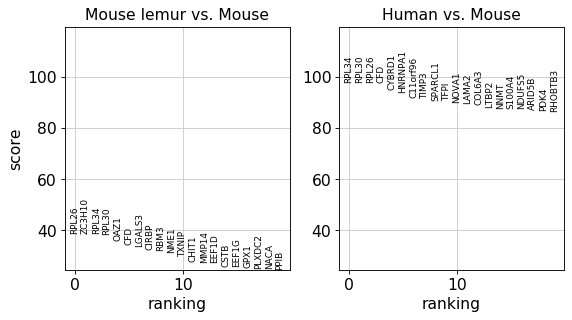

ranking genes



------- group: stromal: pericyte cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


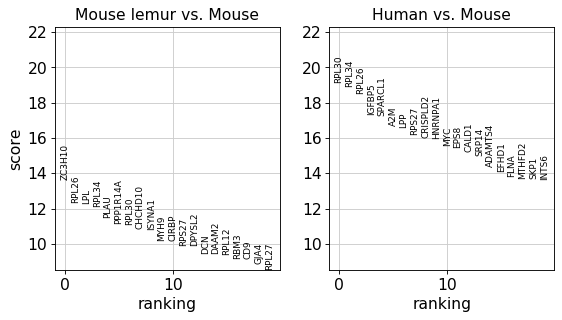

ranking genes



------- group: stromal: skeletal muscle satellite stem cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


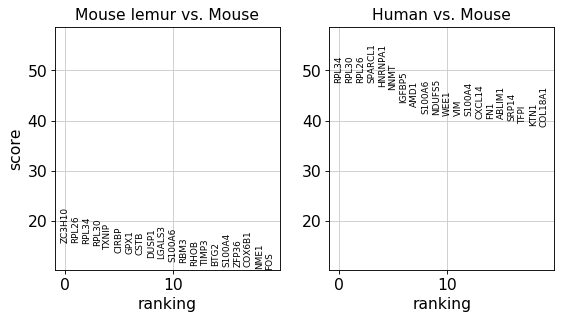

ranking genes



------- group: stromal: tendon cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


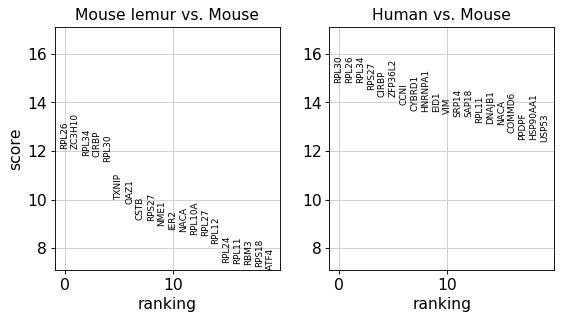

In [9]:
cross_species.do_differential_expression(method='wilcoxon')

## Make differential expression results info tables

In [10]:
cross_species.get_per_group_diffexpr_tables?

Signature: cross_species.get_per_group_diffexpr_tables(dissociation_genes=None)
Docstring: <no docstring>
File:      ~/code/tabula-microcebus--olgabot/rerun-cross-species-jan2021/notebooks/xspecies.py
Type:      method


In [11]:
group_diffexpr_info = {
    group: diffexpr_info 
    for group, diffexpr_info in cross_species.get_per_group_diffexpr_tables(
        dissociation_genes=dissociation_genes
    )
}

NameError: name 'dissociation_genes' is not defined

### Write full results to google drive

In [ ]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_full_results.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        sheet_name = group.split(": ")[-1]
        diffexpr_info.to_excel(writer, sheet_name=sheet_name)

### Write filtered results to google drive

In [ ]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_filtered__pval<0.05__same_logfoldchange_direction__results.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        sheet_name = group.split(": ")[-1]
        diffexpr_info_filtered = cross_species.filter_diffexpr_info(diffexpr_info)
        diffexpr_info_filtered.to_excel(writer, sheet_name=sheet_name)

In [ ]:
diffexpr_info_filtered

## Concatenate differential expression info

In [ ]:
dfs = []

for group, diffexpr_info in group_diffexpr_info.items():
    df = diffexpr_info.copy()
    df['group'] = group
    dfs.append(df)
diffexpr_aggregated = pd.concat(dfs)
diffexpr_aggregated.head()

## Volcano plot (pval vs logfoldchange)

### Reformat to tidy dataframe

In [ ]:
diffexpr_aggregated_tidy = diffexpr_aggregated.stack().reset_index()
diffexpr_aggregated_tidy['species'] = diffexpr_aggregated_tidy['species'].replace('', np.nan)
diffexpr_aggregated_tidy.is_dissociation_gene = diffexpr_aggregated_tidy.is_dissociation_gene.fillna(method='backfill')
diffexpr_aggregated_tidy.group = diffexpr_aggregated_tidy.group.fillna(method='backfill')
diffexpr_aggregated_tidy.head()

In [ ]:
sns.set_context('paper')

In [ ]:
'logfoldchange_threshold'.upper()

In [ ]:
'neg_log10_pvalue_threshold'.upper()

In [ ]:
LOGFOLDCHANGE_THRESHOLD = 20
NEG_LOG10_PVALUE_THRESHOLD = 10

In [ ]:
tab10 = sns.color_palette('tab10')
mouse_color, lemur_color, human_color = tab10[:3]

In [ ]:
tab10 = sns.color_palette('tab10')
mouse_color, lemur_color, human_color = tab10[:3]

def scatterplot_significance(
    x,
    y,
    *args,
    logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
    neg_log10_pvalue_threshold=NEG_LOG10_PVALUE_THRESHOLD,
    **kwargs
):
    logfoldchange_mask = x.abs() > logfoldchange_threshold
    pvalue_mask = y > neg_log10_pvalue_threshold
    significance_mask = logfoldchange_mask & pvalue_mask

    # Plot insignificant in grey with low alpha (transparent)
    sns.scatterplot(
        x=x[~significance_mask], y=y[~significance_mask], color="grey", alpha=0.1
    )

    # Plot significant genes in color with no alpha
    sns.scatterplot(x=x[significance_mask], y=y[significance_mask], *args, **kwargs)


g = sns.FacetGrid(
    diffexpr_aggregated_tidy,
    col="species",
    hue="species",
    row="group",
    aspect=1.4,
    height=2.5,
    palette=[human_color, lemur_color],
)
g.map(scatterplot_significance, "logfoldchange", "pval_adj_neg_log10", rasterized=True)
g.set_titles("{row_name}")
for ax in g.axes.flat:
    title = ax.get_title()
    title = title.split(":")[-1].strip()
    ax.set_title(title)
g.add_legend()
g.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__volcanoplot.pdf"), dpi=300
)

## Plot logfoldchange

In [ ]:
pvalue_mask = (diffexpr_aggregated['pval_adj_neg_log10'] > NEG_LOG10_PVALUE_THRESHOLD).any(axis=1)
logfoldchange_mask = (diffexpr_aggregated['logfoldchange'].abs() > LOGFOLDCHANGE_THRESHOLD).any(axis=1)
diffexpr_aggregated_significant = diffexpr_aggregated.loc[pvalue_mask & logfoldchange_mask]
diffexpr_aggregated_significant

In [ ]:
xlsx_significant = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression__significant_only.xlsx",
)

diffexpr_aggregated_significant.to_excel(xlsx_significant)

In [ ]:
from adjustText import adjust_text


def add_gene_names(
    x,
    y,
    *args,
    significance_multiplier=2,
    logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
    **kwargs,
):
    threshold = logfoldchange_threshold * significance_multiplier
    x_mask = x.abs() > (logfoldchange_threshold * significance_multiplier)
    y_mask = y.abs() > (logfoldchange_threshold * significance_multiplier)
    significance_mask = x_mask | y_mask
    x_masked = x[significance_mask]
    y_masked = y[significance_mask]

    texts = []
    xs_plotted = []
    ys_plotted = []
    for x0, y0, gene_name in zip(x, y, x.index):
        not_ribosomal = not gene_name.startswith("RP")
        if (abs(x0) > threshold or abs(y0) > threshold) and not_ribosomal:
            text = plt.annotate(gene_name, (x0, y0))
            xs_plotted.append(x0)
            ys_plotted.append(y0)
            #         else:
            #             text = plt.text(x0, y0, ' ')
            texts.append(text)

    sns.scatterplot(x=xs_plotted, y=ys_plotted, linewidth=0.5, edgecolor="red")

    # Get the points already plotted to avoid
    ax = plt.gca()
    scatter = ax.collections
    adjust_text(
        texts,
        np.asarray(xs_plotted),
        np.asarray(ys_plotted),
        #         add_objects=scatter,
        #         # Decrease precision
        #         precision=0.5,
        #         # Increase number of iterations
        #         lim=5000,
        # Add arrow
#         save_steps=True,
        arrowprops=dict(arrowstyle="-", color="k", lw=0.5),
    )
    ax.axhline()
    ax.axvline()


g = sns.FacetGrid(
    data=diffexpr_aggregated_significant, col="group", aspect=1.5, col_wrap=2, sharex=False, sharey=False
)
g.map(
    sns.scatterplot,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse lemur"),
    alpha=0.2,
)
# g.set(ylim=[-650, 100])
g.map(add_gene_names, ("logfoldchange", "Human"), ("logfoldchange", "Mouse lemur"))
g.set_titles("{col_name}")
g.set(xlabel="Human log fold change", ylabel="Mouse lemur log fold change")
g.fig.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur.pdf")
)

## Get genes changing in both human-mouse and lemur-mouse comparisons, find primate gain and loss

In [ ]:
diffexpr_aggregated_changing = diffexpr_aggregated.loc[(diffexpr_aggregated.logfoldchange != 0).all(axis=1)].dropna()
diffexpr_aggregated_changing.shape

str_to_quadrant = {
    "True-True": "Primate gain",
    "False-False": "Primate loss",
    "True-False": "Human gain",
    "False-True": "Lemur gain",
}

diffexpr_aggregated_changing["primate_category"] = (
    (diffexpr_aggregated_changing.logfoldchange > 0)
    .apply(lambda x: "-".join(map(str, x)), axis=1)
    .map(str_to_quadrant)
)
diffexpr_aggregated_changing.head()

sns.set(context='paper', style='whitegrid')

diffexpr_aggregated_changing.group.value_counts()

diffexpr_aggregated_changing_primate_categories = diffexpr_aggregated_changing.groupby(['group']).primate_category.value_counts()
diffexpr_aggregated_changing_primate_categories.head()

diffexpr_aggregated_changing_primate_categories_percent = (
    diffexpr_aggregated_changing_primate_categories.groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    )
)
diffexpr_aggregated_changing_primate_categories_percent.name = 'percent_genes'
diffexpr_aggregated_changing_primate_categories_percent = diffexpr_aggregated_changing_primate_categories_percent.reset_index()

diffexpr_aggregated_changing_primate_categories_percent.head()

primate_gain = diffexpr_aggregated_changing_primate_categories_percent.query('primate_category == "Primate gain"')
primate_gain =  primate_gain.sort_values('percent_genes', ascending=False)
primate_gain

primate_loss = diffexpr_aggregated_changing_primate_categories_percent.query('primate_category == "Primate loss"')
primate_loss =  primate_loss.sort_values('percent_genes', ascending=False)
primate_loss

# g = sns.catplot(
#     data=diffexpr_aggregated_changing_primate_categories_percent,
#     hue="primate_category",
#     y="group",
#     x='percent_genes',
#     kind='bar',
#     order=primate_gain.group,
#     height=5,
#     aspect=1.25,
# )
# g.savefig(
#     os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur__primate_gain_loss_barplot.pdf")
# )

g = sns.catplot(
    data=diffexpr_aggregated_changing_primate_categories_percent,
    col="primate_category",
    y="group",
    x='percent_genes',
    kind='bar',
    order=primate_gain.group,
    height=3,
    aspect=1.25,
    sharey=False,
    col_wrap=2
)
g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur__primate_gain_loss_barplot.pdf")
)

In [ ]:
cross_species.mini_adatas.keys()

In [ ]:
group = 'stromal: skeletal muscle cell'
ad = cross_species.mini_adatas[group]

In [ ]:
ad

In [ ]:
de_scores = cross_species.extract_de_scores(ad)
de_scores.head()

In [ ]:
de_scores.tail()

In [ ]:
sns.distplot(de_scores)

In [ ]:
de_scores.describe()

In [ ]:
de_names = cross_species.extract_de_names(ad)
de_names.head()

In [ ]:
(de_scores.abs() > 1e-3).sum()

In [ ]:
abs_score_threshold = 1e-3

In [ ]:
score_mask = de_scores.abs() > abs_score_threshold
de_names = de_names[score_mask].dropna(how='all')
de_names.head()

In [ ]:
de_names

In [ ]:
de_names.shape

In [59]:
gene_names = cross_species.get_differentially_expressed_gene_names(
    ad, "alphabetically", abs_score_threshold=1e-3
)
print(len(gene_names))
gene_names

58


Index(['ACTA1', 'AK1', 'APOBEC2', 'ATF4', 'CFL2', 'CHCHD10', 'CHCHD2', 'COX5A',
       'COX6B1', 'COX7A2', 'CSRP3', 'EEF1A1', 'EEF1G', 'ENO3', 'FXYD1',
       'GABARAP', 'GLRX', 'GPI', 'HSPB1', 'HSPB7', 'MYL1', 'MYL2', 'MYOT',
       'MYOZ2', 'NDUFA13', 'NDUFA6', 'NDUFB10', 'NDUFC1', 'NME2', 'PDLIM3',
       'PGAM2', 'PPDPF', 'PTP4A3', 'RBM3', 'RPL13', 'RPL15', 'RPL3', 'RPL31',
       'RPLP0', 'RPLP1', 'RPS17', 'RPS20', 'RPS5', 'RPS7', 'S100A6', 'SLC25A4',
       'SMPX', 'TNNC1', 'TNNC2', 'TNNT1', 'TNNT3', 'TPT1', 'TTN', 'TUBA4A',
       'UQCRQ', 'VDAC1', 'VIM', 'ZC3H10'],
      dtype='object')

In [58]:
gene_names = cross_species.get_differentially_expressed_gene_names(
    ad, "score", abs_score_threshold=1e-3
)
print(len(gene_names))
gene_names

58


Index(['TPT1', 'RPLP1', 'TTN', 'ACTA1', 'EEF1A1', 'ENO3', 'VIM', 'TNNC2',
       'S100A6', 'MYL2', 'PDLIM3', 'RPL13', 'RPL3', 'GLRX', 'TNNC1', 'RPL15',
       'GPI', 'NDUFB10', 'RPS20', 'TNNT1', 'RBM3', 'MYOT', 'GABARAP', 'ATF4',
       'PTP4A3', 'PGAM2', 'CHCHD2', 'NDUFA13', 'RPS7', 'HSPB1', 'COX7A2',
       'COX6B1', 'AK1', 'NDUFC1', 'PPDPF', 'APOBEC2', 'TUBA4A', 'NDUFA6',
       'CFL2', 'RPL31', 'CSRP3', 'FXYD1', 'RPS5', 'SMPX', 'VDAC1', 'HSPB7',
       'TNNT3', 'ZC3H10', 'UQCRQ', 'COX5A', 'RPLP0', 'EEF1G', 'MYOZ2',
       'CHCHD10', 'NME2', 'RPS17', 'SLC25A4', 'MYL1'],
      dtype='object')

In [56]:
gene_names

Index(['TPT1', 'RPLP1', 'TTN', 'ACTA1', 'EEF1A1', 'ENO3', 'VIM', 'TNNC2',
       'S100A6', 'MYL2', 'PDLIM3', 'RPL13', 'RPL3', 'GLRX', 'TNNC1', 'RPL15',
       'GPI', 'NDUFB10', 'RPS20', 'TNNT1', 'RBM3', 'MYOT', 'GABARAP', 'ATF4',
       'PTP4A3', 'PGAM2', 'CHCHD2', 'NDUFA13', 'RPS7', 'HSPB1', 'COX7A2',
       'COX6B1', 'AK1', 'NDUFC1', 'PPDPF', 'APOBEC2', 'TUBA4A', 'NDUFA6',
       'CFL2', 'RPL31', 'CSRP3', 'FXYD1', 'RPS5', 'SMPX', 'VDAC1', 'HSPB7',
       'TNNT3', 'ZC3H10', 'UQCRQ', 'COX5A', 'RPLP0', 'EEF1G', 'MYOZ2',
       'CHCHD10', 'NME2', 'RPS17', 'SLC25A4', 'MYL1'],
      dtype='object')

In [62]:
figure_folder_base

'/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/muscle/differential-expression'

In [69]:
save_folder = os.path.join(figure_folder_base, 'dotplots')
! mkdir -p $save_folder
sc.settings.figdir = save_folder

## Get list of dissociation genes

In [71]:
dissociation_genes = set(pd.read_csv('/home/olga/data_lg/data_sm_copy/immune-evolution/databases/nuisance-genes/dissociation_genes_3Nov2020.csv', index_col=0, squeeze=True))
len(dissociation_genes)

1880

## Dotplots of primate loss of expresion


------- group: lymphoid: T cell -------
No genes found with primate_larger=False

------- group: stromal: mesenchymal cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


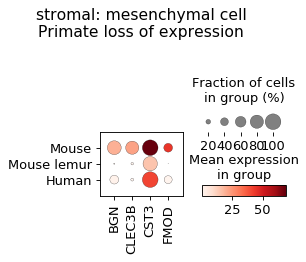


------- group: stromal: skeletal muscle cell -------


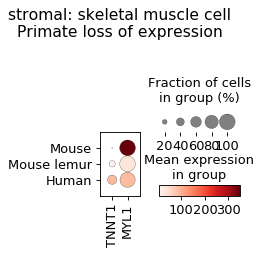


------- group: stromal: skeletal muscle satellite stem cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


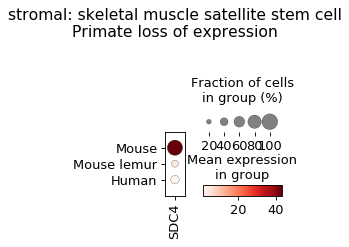

In [119]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=False,
    save=True,
    save_format='pdf' 
    
)

## Dotplots of primate gain of expression


------- group: lymphoid: T cell -------


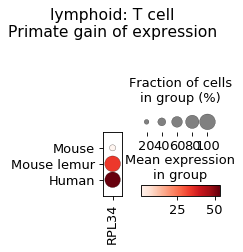


------- group: stromal: mesenchymal cell -------


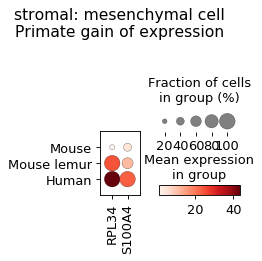


------- group: stromal: skeletal muscle cell -------


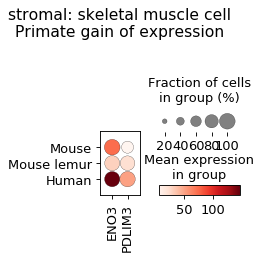


------- group: stromal: skeletal muscle satellite stem cell -------


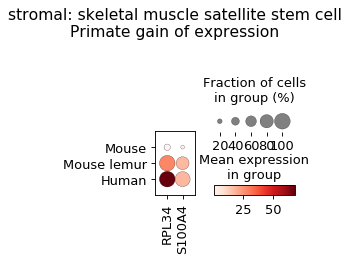

In [120]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=True,
    save=True,
    save_format='pdf' 
    
)

## Read Muscle disease genes

In [91]:
muscle_disease_genes_df = pd.read_excel(
    "/home/olga/googledrive/TabulaMicrocebus/data/muscle-disease-genes-for-lemur.xlsx",
    sheet_name="Muscle Disease Genes",
    skiprows=1,
    engine="openpyxl",
)
muscle_disease_genes_df.head()

,Unnamed: 0,Symbol,Name,disease,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1.0,CAPN3,Calpain3,LGMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,CAV3,Caveolin3,LGMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,DYSF,Dysferlin,LGMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,DTNA,DystrobrevinA,LGMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,DTNB,DystrobrevinB,LGMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Subset to only disease genes in adata

In [103]:
disease_gene_names = [x.strip() for x in muscle_disease_genes_df.Symbol.unique() if isinstance(x, str)]
len(disease_gene_names)

77

In [108]:
disease_gene_names_in_adata = [x for x in disease_gene_names if x in adata.var.index]
len(disease_gene_names_in_adata)

61

### Make dotplots of muscle disease genes

gene subset #1

------- group: lymphoid: T cell -------


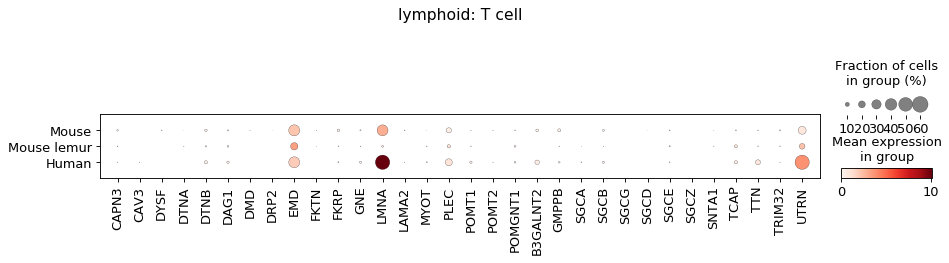


------- group: stromal: mesenchymal cell -------


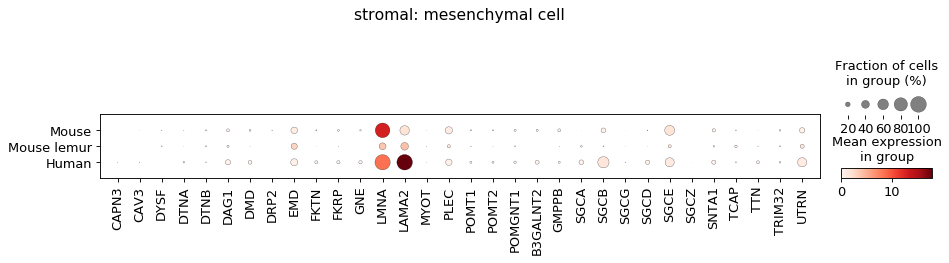


------- group: stromal: skeletal muscle cell -------


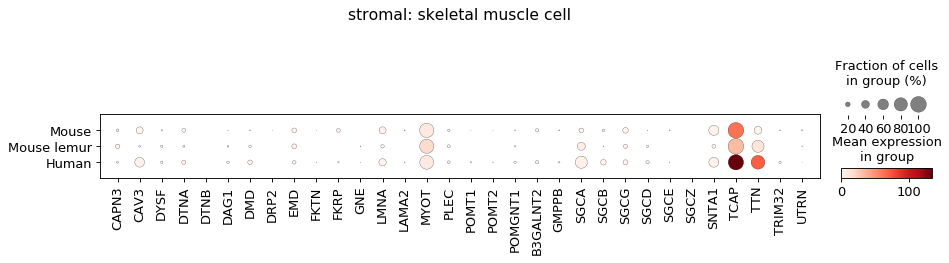


------- group: stromal: skeletal muscle satellite stem cell -------


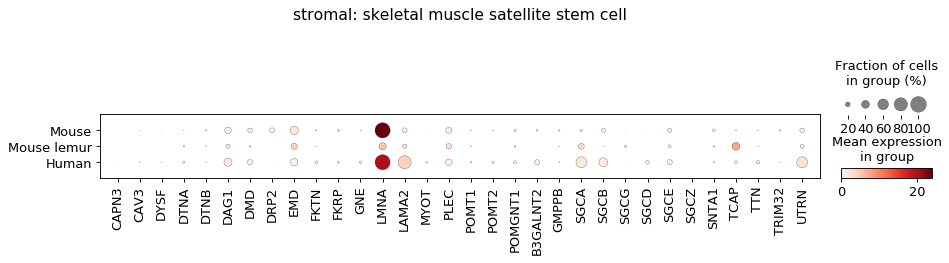

gene subset #2

------- group: lymphoid: T cell -------


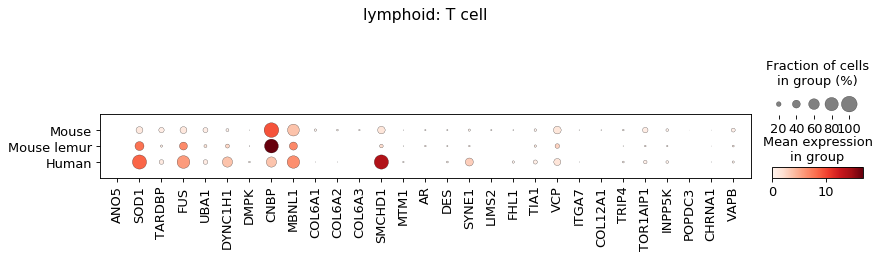


------- group: stromal: mesenchymal cell -------


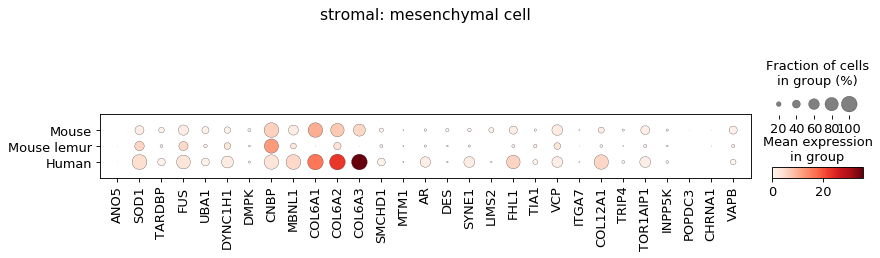


------- group: stromal: skeletal muscle cell -------


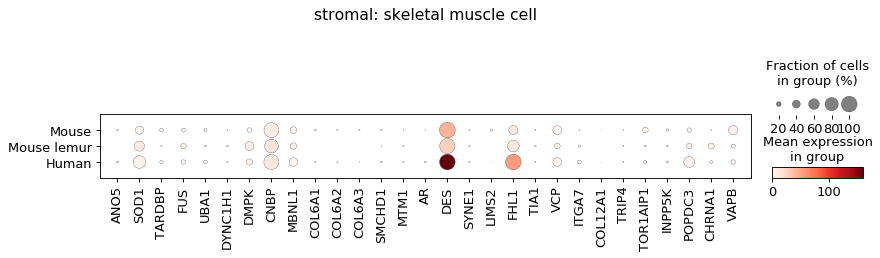


------- group: stromal: skeletal muscle satellite stem cell -------


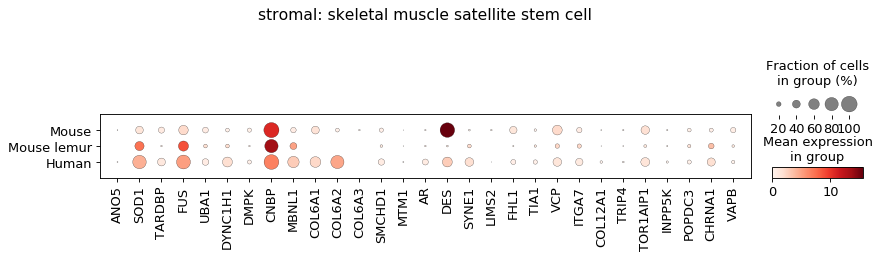

In [122]:
cross_species.dotplots(
    disease_gene_names_in_adata, save="__muscle_disease_genes", save_format="pdf", max_genes=32,
)

## Muscle stem cell genes

In [113]:
muscle_stem_cell_genes_df = pd.read_excel(
    "/home/olga/googledrive/TabulaMicrocebus/data/muscle-disease-genes-for-lemur.xlsx",
    sheet_name="Muscle Stem Cell Genes",
    skiprows=3,
    engine="openpyxl",
)
muscle_stem_cell_genes_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Symbol,Unnamed: 4
0,NaN,NaN,1,PAX7,quiescence
1,NaN,NaN,2,PAX3,NaN
2,NaN,NaN,3,MYF5,NaN
3,NaN,NaN,4,CALCR,NaN
4,NaN,NaN,5,SPRY1,NaN


### Subset to only muscle stem cell genes in adata

In [114]:
muscle_stem_cell_gene_names = [
    x.strip() for x in muscle_stem_cell_genes_df.Symbol.unique() if isinstance(x, str)
]
print(len(muscle_stem_cell_gene_names))

muscle_stem_cell_gene_names_in_adata = [x for x in muscle_stem_cell_gene_names if x in adata.var.index]
len(muscle_stem_cell_gene_names_in_adata)

18


15

### Make dotplots of muscle disease genes

gene subset #1

------- group: lymphoid: T cell -------


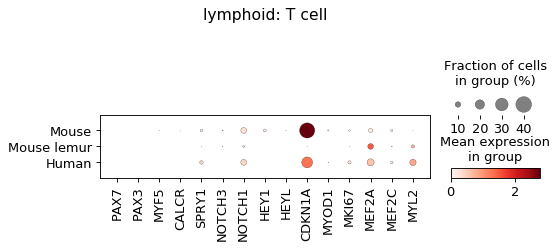


------- group: stromal: mesenchymal cell -------


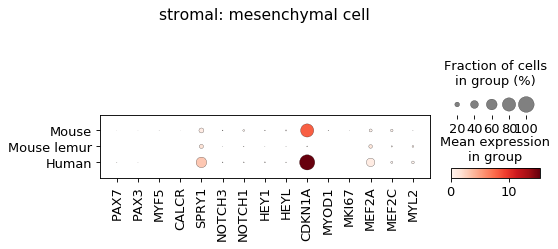


------- group: stromal: skeletal muscle cell -------


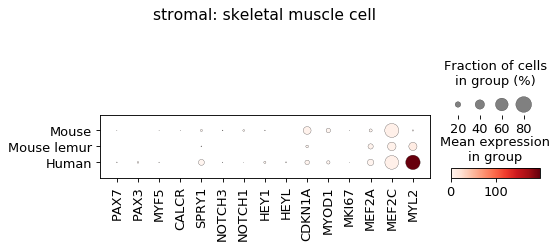


------- group: stromal: skeletal muscle satellite stem cell -------


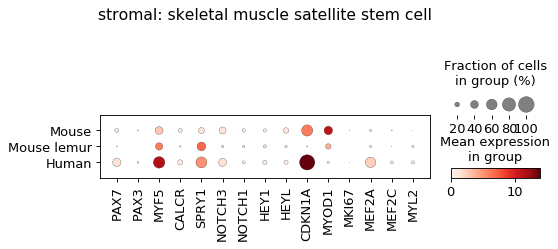

In [116]:
cross_species.dotplots(
    muscle_stem_cell_gene_names_in_adata, save_suffix="__muscle_stem_cell_genes", save_format="pdf"
)

## Dotplolts

In [ ]:
cross_species.species_to_color_map = xspecies.SPECIES_TO_COLOR_MAP
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species-lung/across-species-within-group-diffexpr/ligand_groups'
# ! rm -rf $outdir_gdrive
! mkdir $outdir_gdrive

sc.set_figure_params(
    dpi=200, dpi_save=300, transparent=True, vector_friendly=True, frameon=False
)


for ligand, index in ligand_groups_primate.items():
    print(f'--- {ligand} ---')

    ligands_of_receptors = receptor_ligand_pairs_primate.loc[index]
    
    receptor_subset = sorted(list(ligands_of_receptors[receptor_col].unique()))
    ligand_subset = sorted(list(ligands_of_receptors[ligand_col].unique()))
    gene_subset = ligand_subset + receptor_subset
    print(f'number of overlapping genes: {len(gene_subset)}')
    if not gene_subset:
        continue
    
    save_dir = f'{outdir_gdrive}/ligand-centric/{ligand}/'
    ! mkdir -p $save_dir
    sc.settings.figdir = save_dir
    
    cross_species.dotplot_multispecies(gene_subset, save_prefix=ligand)
